In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Feature Selection

### 1. Basic EDA

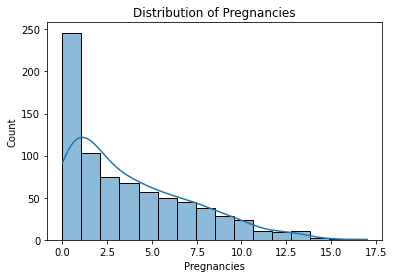

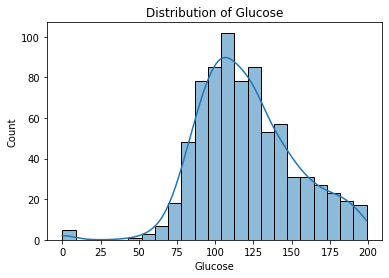

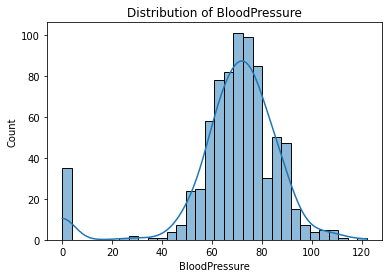

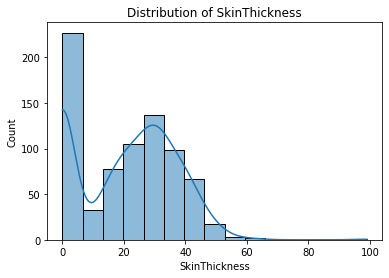

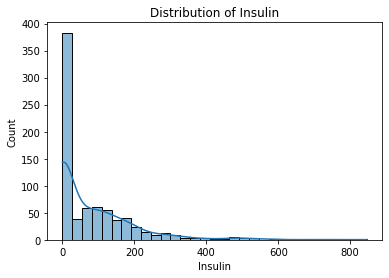

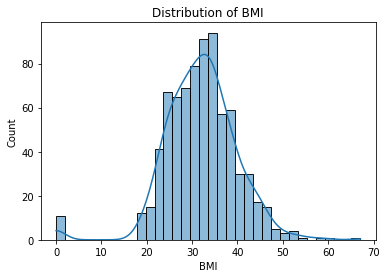

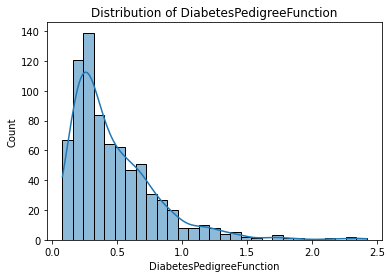

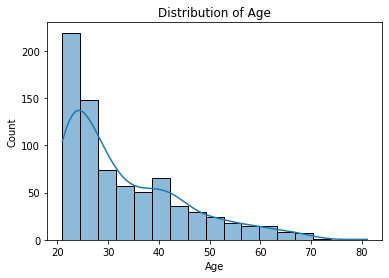

--------------------------------------------------


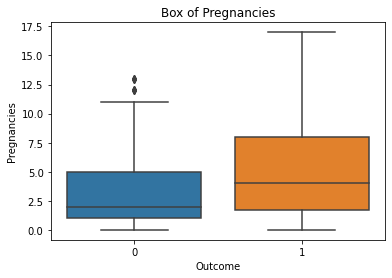

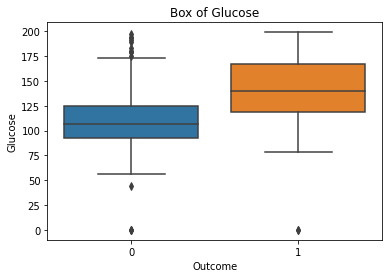

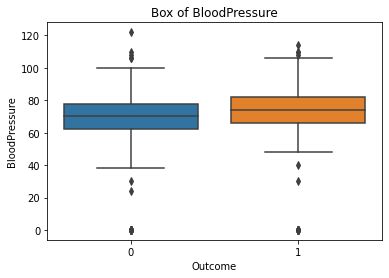

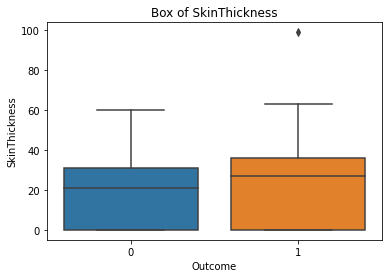

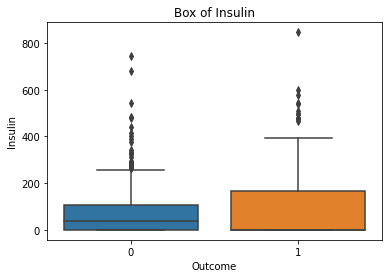

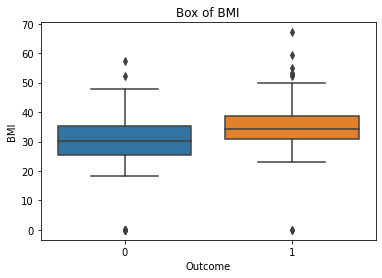

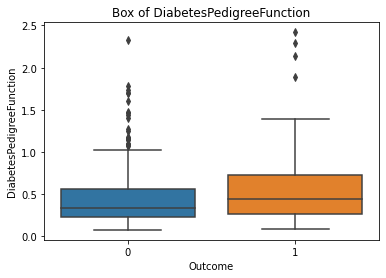

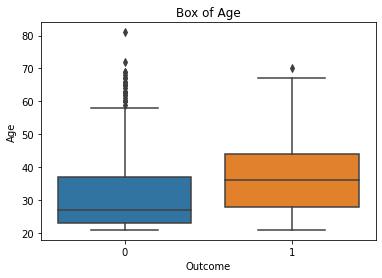

--------------------------------------------------


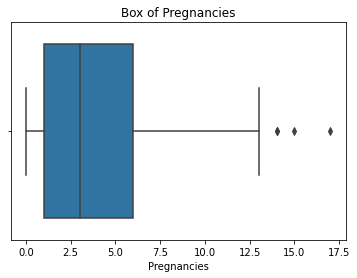

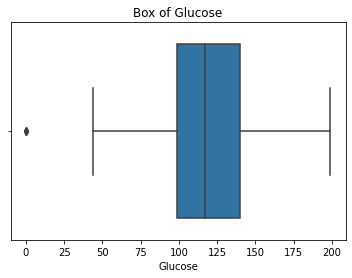

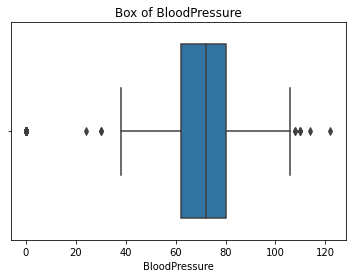

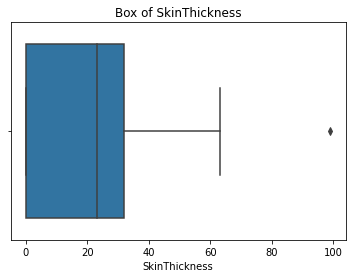

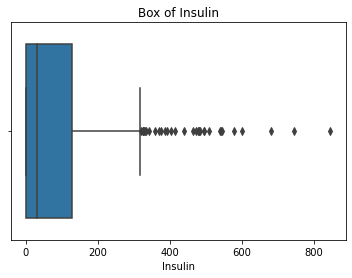

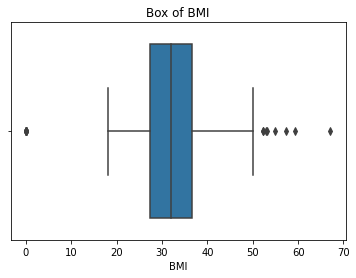

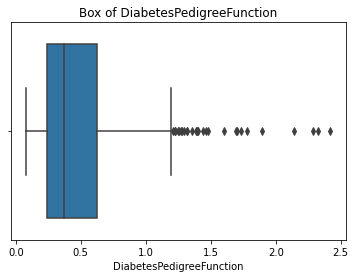

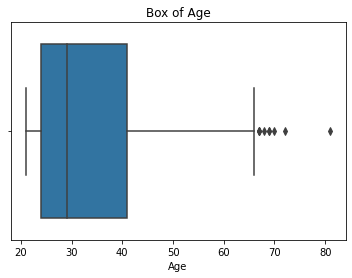

In [7]:
# Distribution of Each column
for col in df.columns[:-1]:
    sns.histplot(x=col,data=df,kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

print('-'*50)

# Boxplot
for col in df.columns[:-1]:
    sns.boxplot(x='Outcome',y=col,data=df)
    plt.title(f"Box of {col}")
    plt.show()

print('-'*50)

# Boxplot single
for col in df.columns[:-1]:
    sns.boxplot(x=col,data=df)
    plt.title(f"Box of {col}")
    plt.show()


### 2. Correlation Analysis

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
--------------------------------------------------
                    Feature        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


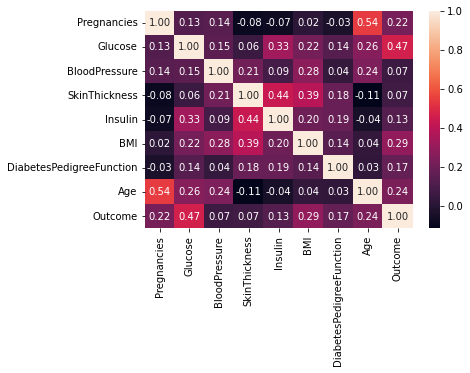

In [8]:
# Full Heatmap
corr = df.corr()

sns.heatmap(corr,annot=True,fmt='.2f')


# Top correlation with Target
target_corr = corr['Outcome'].abs().sort_values(ascending=False)
print(target_corr)
print('-'*50)



# Check multicollinearity Quantitatively (Using Variance Inflation Factor) VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif_data = pd.DataFrame()  
vif_data["Feature"] = df.drop('Outcome', axis=1).columns  
vif_data["VIF"] = [variance_inflation_factor(df.drop('Outcome', axis=1).values, i) for i in range(df.shape[1]-1)]  
print(vif_data)


#VIF > 5-10 → High multicollinearity.
#VIF < 5 → Safe to keep.


## 3.Statistical Tests

In [9]:
# Hypothesis Testing 

# T-test for numerical columns
from scipy.stats import ttest_ind

# T-test for each feature b/w diabetic/non-diabetic groups
for col in df.columns[:-1]:
    group0 = df[df['Outcome'] == 0][col]
    group1 = df[df['Outcome'] == 1][col]
    t_stat,p_val = ttest_ind(group0,group1)
    print(f"{col}: t-stat={t_stat:.3f},p-value={p_val:.3f}")

print('-'*50)


#For Categorical Columns we should apply chi2_contingency test

# from scipy.stats import chi2_contingency

# significant_categorical = {}

# for col in categorical_columns:
#     #create a contengency table (cross-tabulation)
#     contengency_table = pd.crosstab(df['Attrition'],df[col])

#     #run chi-square test on the table
#     chi2_stat,p_val,dof,expected = chi2_contingency(contengency_table)

#     if p_val < 0.05:
#         significant_categorical[col] = p_val

#     print(f"{col}: chi-test={chi2_stat:.3f}, p-value={p_val:.3f}")

# len(significant_categorical)
# significant_categorical.keys() 



#For each feature:
#If p < 0.05: Keep it.
#If p > 0.05: Consider dropping it.


Pregnancies: t-stat=-6.298,p-value=0.000
Glucose: t-stat=-14.600,p-value=0.000
BloodPressure: t-stat=-1.805,p-value=0.072
SkinThickness: t-stat=-2.075,p-value=0.038
Insulin: t-stat=-3.644,p-value=0.000
BMI: t-stat=-8.472,p-value=0.000
DiabetesPedigreeFunction: t-stat=-4.886,p-value=0.000
Age: t-stat=-6.793,p-value=0.000
--------------------------------------------------


## 4. Feature Importance with Tree-Based Models

In [10]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Outcome',axis=1)
y = df['Outcome']

#Train the Model
model = RandomForestClassifier()
model.fit(X,y)

#Get Feature Importance
importance = pd.Series(model.feature_importances_,index=X.columns)
importance = importance.sort_values(ascending=False)
print("Feature Importance:\n",importance)

Feature Importance:
 Glucose                     0.259918
BMI                         0.163482
Age                         0.140296
DiabetesPedigreeFunction    0.129234
BloodPressure               0.086378
Pregnancies                 0.080599
Insulin                     0.072088
SkinThickness               0.068005
dtype: float64


## 5. RFE (Recursive Feature Elimination)

In [11]:
from sklearn.feature_selection import  RFE

#Select Top Featuers
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5)
rfe.fit(X,y)

#Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features",selected_features.tolist())

Selected Features ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## 6.Mutual Information

In [12]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
mi_series = pd.Series(mi,index=X.columns).sort_values(ascending=False)
print(f"Mutual Information:\n{mi_series}")

#Rule of Thumb:
#MI > 0.05: Feature is worth keeping.
#MI < 0.01: Consider dropping

Mutual Information:
Glucose                     0.125993
Age                         0.073408
BMI                         0.067858
Pregnancies                 0.044166
Insulin                     0.037545
DiabetesPedigreeFunction    0.014574
BloodPressure               0.007340
SkinThickness               0.006832
dtype: float64


## 7. Check Multicollinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate VIF

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(f"VIF Score:\n",vif_data.sort_values(by='VIF',ascending=False))

VIF Score:
                     Feature        VIF
5                       BMI  18.408884
1                   Glucose  16.725078
2             BloodPressure  14.619512
7                       Age  13.492985
3             SkinThickness   4.008696
0               Pregnancies   3.275748
6  DiabetesPedigreeFunction   3.195626
4                   Insulin   2.063689


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.drop(columns='SkinThickness',axis=1)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [16]:
X = df.drop(columns='Outcome',axis=1)
y = df['Outcome']

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
from sklearn.impute import SimpleImputer

robust_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

preprocessor = Pipeline(
    steps= [
        ('imputer',SimpleImputer(strategy='median')),
        ('scalar',StandardScaler())
    ]
    
)

col_transfor = ColumnTransformer(
    transformers= [
        ('preprocess',preprocessor,robust_cols)
                
        
    ],remainder='passthrough'
)

In [22]:
preprocess_pipeline = Pipeline(
    steps=[
        ('pre_process',col_transfor)
    ]
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib

algorithms = {
    "random_forest": RandomForestClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "svm": SVC(),
    "lr": LogisticRegression()

}

results = {}
piepline_info = {}

for name,algo in algorithms.items():
    pipeline = Pipeline(
        steps= [
            ('pipeline',preprocess_pipeline),
            ('algo',algo)

        ]
    )

    pipeline.fit(X_train,y_train)

    joblib.dump(pipeline,f"{name}.pkl")
    piepline_info[name] = pipeline

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(pipeline,X_train,y_train,scoring='accuracy',cv=5)
    cv_mean = cv_score.mean()
    

    results[name] = {
        "accuracy": accuracy,
        "cf_report": clf_report,
        "conf_matrix": conf_matrix,
        "cv_score": cv_score,
        "cv_mean": cv_mean
        
        }
    
    print(f"{name}")
    print(f"Accuracy:{accuracy}")
    print(f"Clf_report:\n{clf_report}")
    print(f"Cf_matrix:\n{conf_matrix}")
    print(f"Cv_score:{cv_score}")
    print(f"cv_mean:{cv_mean}")
    print('-'*50)


random_forest
Accuracy:0.7532467532467533
Clf_report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Cf_matrix:
[[80 19]
 [19 36]]
Cv_score:[0.76422764 0.83739837 0.76422764 0.72357724 0.77868852]
cv_mean:0.7736238837798214
--------------------------------------------------
decision_tree
Accuracy:0.7532467532467533
Clf_report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

Cf_matrix:
[[76 23]
 [15 40]]
Cv_score:[0.72357724 0.78861789 0.

## hyperparameter tunning

In [24]:
# # %% 
# # Step 1: Import Libraries
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
# import matplotlib.pyplot as plt
# import joblib
# import seaborn as sns

# # %% 
# # Step 2: Load and Prepare Data
# df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/diabetes.csv')

# # Replace 0s with NaN in biological features
# zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# df[zero_cols] = df[zero_cols].replace(0, np.nan)

# # Feature Engineering
# df['Glucose_BMI'] = df['Glucose'] * df['BMI']  # Interaction term
# df['Age_Bin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 100], labels=False)  # Binning

# X = df.drop('Outcome', axis=1)
# y = df['Outcome']

# # %%
# # Step 3: Create Advanced Pipeline
# full_pipeline = ImbPipeline([
#     ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing values
#     ('scaler', StandardScaler()),            # Scale features
#     ('smote', SMOTE(random_state=42)),       # Handle class imbalance
#     ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost model
# ])

# # %%
# # Step 4: Hyperparameter Tuning
# param_grid = {
#     'model__n_estimators': [100, 200],
#     'model__max_depth': [3, 5, 7],
#     'model__learning_rate': [0.01, 0.1],
#     'model__scale_pos_weight': [2, 3]        # Penalize misclassifying diabetic cases
# }

# grid_search = GridSearchCV(
#     full_pipeline,
#     param_grid,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     scoring='recall',                        # Focus on minimizing false negatives
#     n_jobs=-1
# )

# grid_search.fit(X, y)

# # %%
# # Step 5: Best Model Evaluation
# best_model = grid_search.best_estimator_
# print(f"Best Parameters: {grid_search.best_params_}")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)
# y_probs = best_model.predict_proba(X_test)[:, 1]

# # %%
# # Step 6: Metrics & Visualization
# print("\n🔥 Final Performance 🔥")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# print(classification_report(y_test, y_pred))

# # Precision-Recall Curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

# # Confusion Matrix
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.show()

# # %%
# # Step 7: Save Model
# joblib.dump(best_model, 'optimized_diabetes_model.pkl')

# # %%
# # Step 8: Test Predictions (Using Your Sample Data)
# test_data = pd.DataFrame({
#     'Pregnancies': [0, 8, 2, 1, 10],
#     'Glucose': [99, 181, 85, 155, 200],
#     'BloodPressure': [72, 90, 60, 88, 70],
#     'SkinThickness': [20, 0, 0, 40, 35],
#     'Insulin': [0, 550, 0, 0, 0],
#     'BMI': [28.0, 33.6, 22.1, 35.2, 38.9],
#     'DiabetesPedigreeFunction': [0.299, 0.672, 0.248, 0.527, 2.420],
#     'Age': [21, 55, 30, 42, None],
#     'Glucose_BMI': [99*28, 181*33.6, 85*22.1, 155*35.2, 200*38.9],  # Manually calculated
#     'Age_Bin': [0, 3, 1, 2, 3]  # Corresponding to 21,55,30,42,None
# })

# # Handle nulls using the pipeline
# predictions = best_model.predict(test_data)
# probabilities = best_model.predict_proba(test_data)[:, 1]

# test_data['Predicted_Outcome'] = predictions
# test_data['Probability'] = probabilities
# print("\n🧪 Test Predictions:")
# print(test_data[['Glucose', 'BMI', 'Age', 'Predicted_Outcome', 'Probability']])